In [1]:
import awkward as ak
import numpy as np
import uproot
import matplotlib.pyplot as plt
from hffrag import fixedbinning
from hffrag import binneddensity


PDG ID: 531
number of b-hadrons: 13487

PDG ID: -521
number of b-hadrons: 61531

PDG ID: -511
number of b-hadrons: 61243

PDG ID: 5232
number of b-hadrons: 751

PDG ID: 511
number of b-hadrons: 61706

PDG ID: 521
number of b-hadrons: 61594

PDG ID: -531
number of b-hadrons: 13526

PDG ID: -5122
number of b-hadrons: 5447

PDG ID: 5122
number of b-hadrons: 5232

PDG ID: -5132
number of b-hadrons: 676

PDG ID: 5132
number of b-hadrons: 722

PDG ID: -5232
number of b-hadrons: 733

PDG ID: 555
number of b-hadrons: 3

PDG ID: 553
number of b-hadrons: 6

PDG ID: -5332
number of b-hadrons: 21

PDG ID: 5332
number of b-hadrons: 18

PDG ID: 100553
number of b-hadrons: 1

PDG ID: -541
number of b-hadrons: 5

PDG ID: 10551
number of b-hadrons: 3

PDG ID: 541
number of b-hadrons: 5

PDG ID: 20553
number of b-hadrons: 1



2022-11-16 15:06:27.717808: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-16 15:06:28.053965: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-16 15:06:28.071226: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-16 15:06:28.071245: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [3]:
%matplotlib inline
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'red'
plt.rc('text',usetex = True)
plt.rc('font',family = 'serif')
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}


In [4]:
#The data is being stored in a tree datastructure. 
#We access the charm root using this command
tree = uproot.open("hffrag.root:CharmAnalysis")

In [5]:
#Select the features we wish to study
track_features = ["AnalysisTracks_pt","AnalysisTracks_eta","AnalysisTracks_phi", "AnalysisTracks_z0sinTheta","AnalysisTracks_d0sig","AnalysisTracks_d0","AnalysisTracks_d0sigPV","AnalysisTracks_d0PV"]
jet_features = ["AnalysisAntiKt4TruthJets_pt","AnalysisAntiKt4TruthJets_eta","AnalysisAntiKt4TruthJets_phi","AnalysisAntiKt4TruthJets_ghostB_pt"]
MAXEVENTS = 1e10

In [6]:
#Read in the data from the root file
features = tree.arrays(jet_features+track_features,entry_stop = MAXEVENTS)

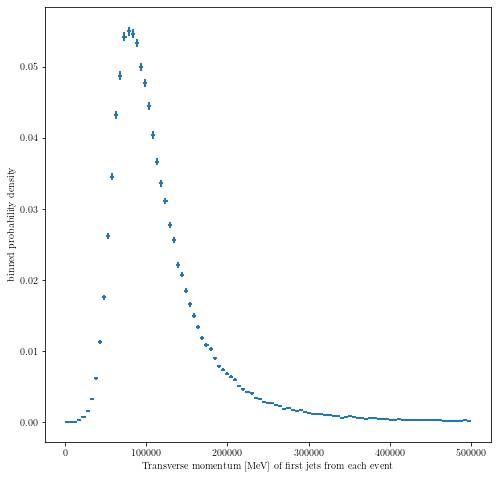

<Figure size 432x288 with 0 Axes>

In [7]:
Figure = plt.figure()
jet_pt_distribution = binneddensity(features["AnalysisAntiKt4TruthJets_pt"][:,0],fixedbinning(0,500000,100),xlabel = "Transverse momentum [MeV] of first jets from each event")
jet_pt_distribution

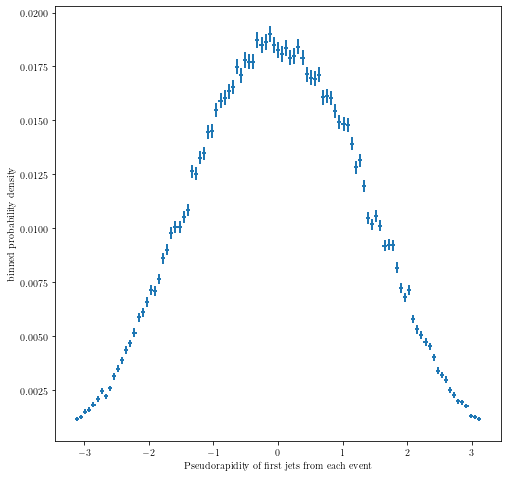

<Figure size 432x288 with 0 Axes>

In [8]:
Figure = plt.figure()
jet_pt_distribution = binneddensity(features["AnalysisAntiKt4TruthJets_eta"][:,0],fixedbinning(-np.pi,np.pi,100),xlabel = "Pseudorapidity of first jets from each event")
jet_pt_distribution

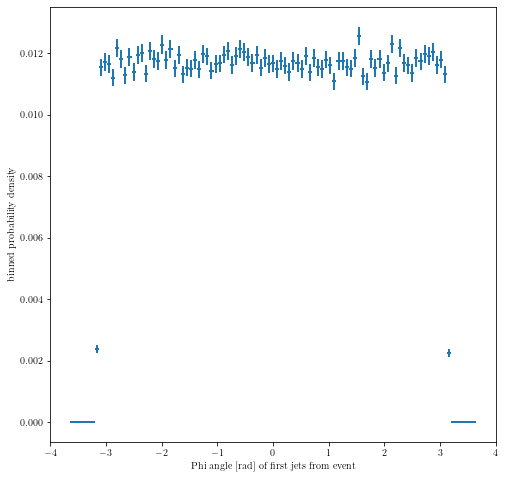

<Figure size 432x288 with 0 Axes>

In [9]:
Figure = plt.figure()
jet_pt_distribution = binneddensity(features["AnalysisAntiKt4TruthJets_phi"][:,0],fixedbinning(-np.pi-0.5,np.pi+0.5,100),xlabel = "Phi angle [rad] of first jets from event")
jet_pt_distribution

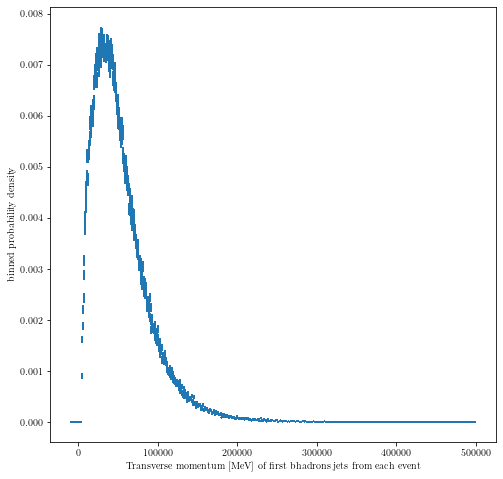

<Figure size 432x288 with 0 Axes>

In [10]:
Figure = plt.figure()
bhadrons = ak.flatten(features["AnalysisAntiKt4TruthJets_ghostB_pt"],axis = None)
jet_bhadron_pt_distribution = binneddensity(bhadrons,fixedbinning(-10000,500000,1000),xlabel = "Transverse momentum [MeV] of first bhadrons jets from each event")
jet_bhadron_pt_distribution

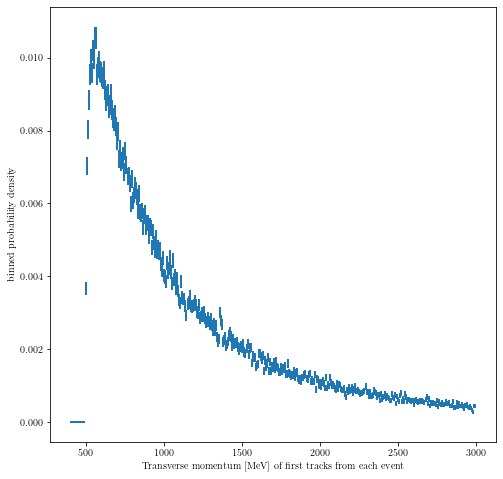

<Figure size 432x288 with 0 Axes>

In [11]:
Figure = plt.figure()
Tracks_pt = binneddensity(features["AnalysisTracks_pt"][:,0],fixedbinning(400,3000,400),xlabel = "Transverse momentum [MeV] of first tracks from each event")
Tracks_pt

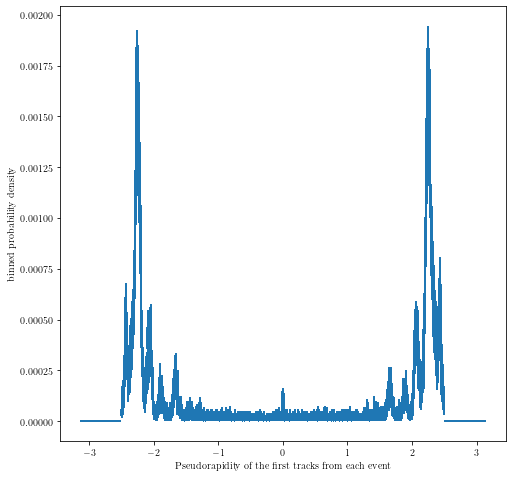

<Figure size 432x288 with 0 Axes>

In [12]:
Figure = plt.figure()
Tracks_eta = binneddensity(features["AnalysisTracks_eta"][:,0],fixedbinning(-np.pi,np.pi,10000),xlabel = " Pseudorapidity of the first tracks from each event")
Tracks_eta

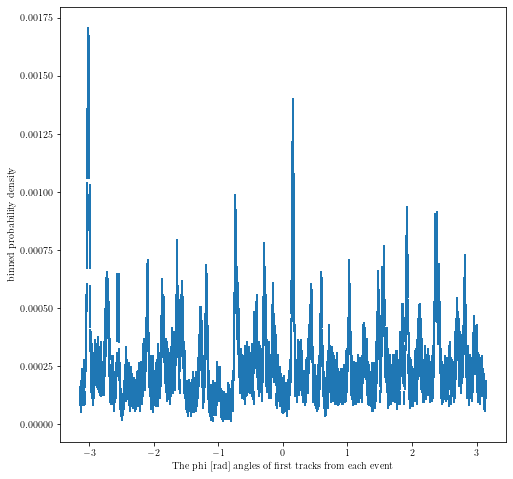

<Figure size 432x288 with 0 Axes>

In [13]:
Figure = plt.figure()
Tracks_phi = binneddensity(features["AnalysisTracks_phi"][:,0],fixedbinning(-np.pi,np.pi,4000),xlabel = "The phi [rad] angles of first tracks from each event")
Tracks_phi

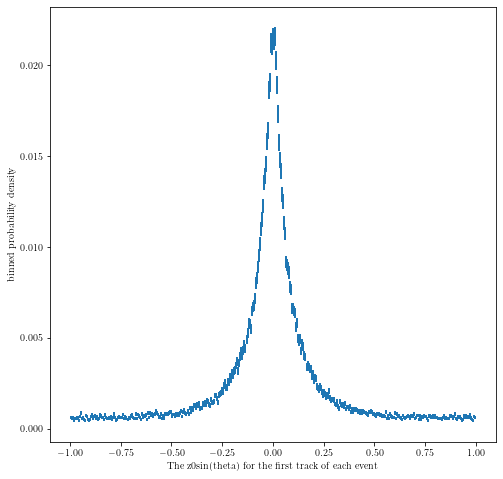

<Figure size 432x288 with 0 Axes>

In [14]:
Figure = plt.figure()
Tracks_z0_sin_theta = binneddensity(features["AnalysisTracks_z0sinTheta"][:,0],fixedbinning(-1,1,400),xlabel = "The z0sin(theta) for the first track of each event ")
Tracks_z0_sin_theta

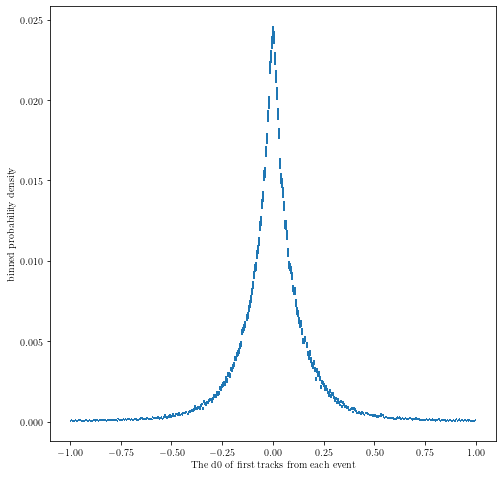

<Figure size 432x288 with 0 Axes>

In [22]:
Figure = plt.figure()
Tracks_z0 = binneddensity(features["AnalysisTracks_d0"][:,0],fixedbinning(-1,1,400),xlabel = "The d0 of first tracks from each event")
Tracks_z0

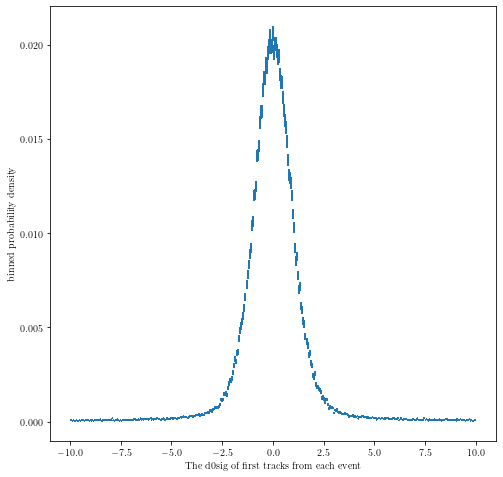

<Figure size 432x288 with 0 Axes>

In [23]:
Figure = plt.figure()
Tracks_pt = binneddensity(features["AnalysisTracks_d0sig"][:,0],fixedbinning(-10,10,400),xlabel = "The d0sig of first tracks from each event")
Tracks_pt

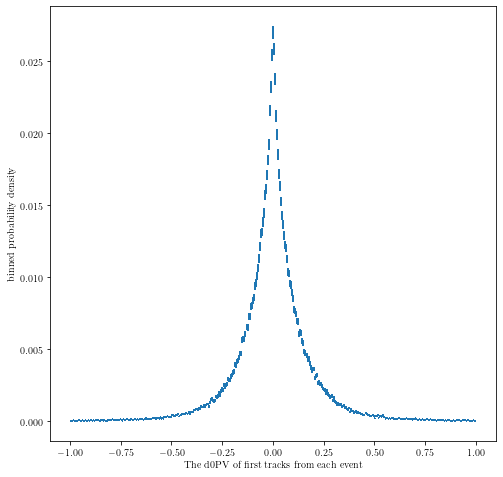

<Figure size 432x288 with 0 Axes>

In [28]:
Figure = plt.figure()
Tracks_pt = binneddensity(features["AnalysisTracks_d0PV"][:,0],fixedbinning(-1,1,400),xlabel = "The d0PV of first tracks from each event")
Tracks_pt

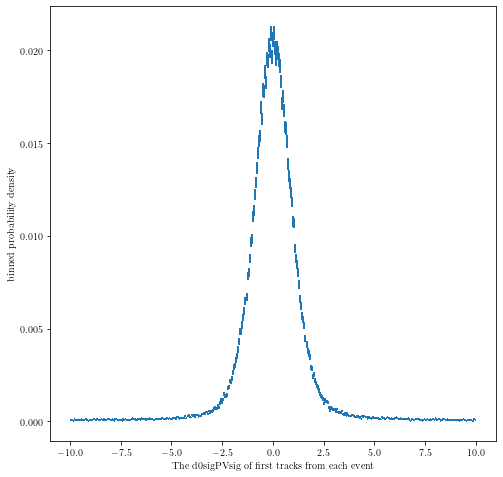

<Figure size 432x288 with 0 Axes>

In [27]:
Figure = plt.figure()
Tracks_pt = binneddensity(features["AnalysisTracks_d0sigPV"][:,0],fixedbinning(-10,10,400),xlabel = " The d0sigPVsig of first tracks from each event")
Tracks_pt